In [1]:
import sympy as sp
import numpy as np
import scipy.constants as const
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import display, Math


In [2]:
# Define the symbols
t = sp.symbols('t')  # Time variable
m, g, L0 = sp.symbols('m g L0')  # Mass, gravity and string length
θ = sp.Function('θ')(t)  # Theta as a function of time
l = sp.Function('l')(t)  # Length as a function of time

# Define the derivatives
θ_dot = sp.diff(θ, t)  # First derivative of θ with respect to time
l_dot = sp.diff(l, t)  # First derivative of l with respect to time
θ_double_dot = sp.diff(θ, t, 2)  # Second derivative of θ with respect to time
l_double_dot = sp.diff(l, t, 2)  # Second derivative of l with respect to time


In [3]:
# Define Lagrangian
T = 1/2 * m * (l_dot**2 + l**2 * θ_dot**2) + 1/2 * m * l_dot**2  # Kinetic energy
V = - m * g * l * sp.cos(θ) - m * g * (L0 - l)  # Potential energy

# Lagrangian
L = T - V


In [4]:
display(Math('T = ' + sp.latex(T)))
display(Math('V = ' + sp.latex(V)))
display(Math('L = T - V = ' + sp.latex(L)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Derive equations of motion (Applying Euler-Lagrange equations)
del_θ = sp.diff(sp.diff(L, θ_dot), t) - sp.diff(L, θ)
del_l = sp.diff(sp.diff(L, l_dot), t) - sp.diff(L, l)


In [6]:
# Simplify the equations
del_θ = sp.simplify(del_θ)
del_l = sp.simplify(del_l)

display(Math(sp.latex(del_θ) + ' = 0'))
display(Math(sp.latex(del_l) + ' = 0'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Convert to expressions for the second derivatives
θ_double_dot_expr = sp.solve(del_θ, θ_double_dot)[0]
l_double_dot_expr = sp.solve(del_l, l_double_dot)[0]
display(Math('\ddot{θ}(t) = ' + sp.latex(θ_double_dot_expr)))
display(Math('\ddot{l}(t) = ' + sp.latex(l_double_dot_expr)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Convert sympy expressions to lambdified functions for numerical evaluation

θ_double_dot_num_expr = sp.lambdify(
    (θ, l, θ_dot, l_dot, m, g, L0), θ_double_dot_expr, 'numpy')
l_double_dot_num_expr = sp.lambdify(
    (θ, l, θ_dot, l_dot, m, g, L0), l_double_dot_expr, 'numpy')


In [9]:
def pendulum_system(y, t, m, g, L0):
    # Unpack the system state variables
    θ_n, l_n, θ_dot_n, l_dot_n = y

    θ_double_dot_n = θ_double_dot_num_expr(
        θ_n, l_n, θ_dot_n, l_dot_n, m, g, L0)
    l_double_dot_n = l_double_dot_num_expr(
        θ_n, l_n, θ_dot_n, l_dot_n, m, g, L0)

    return [θ_dot_n, l_dot_n, θ_double_dot_n, l_double_dot_n]


In [10]:
# set the parameters for the motion
m = 1.0  # mass

# set the initial conditions
θ0 = const.pi/32
l0 = 1.0
l_dot0 = 0.0
θ_dot0 = 0.0

# set the time values at which to solve
t = np.linspace(0, 10, 10000)  # from 0 to 10 seconds, 10000 evaluation points

# solve the system
solution = odeint(pendulum_system, [
                  θ0, l0, l_dot0, θ_dot0], t, args=(m, const.g, l0))

θ_n_t = solution[:, 0]
l_n_t = solution[:, 1]


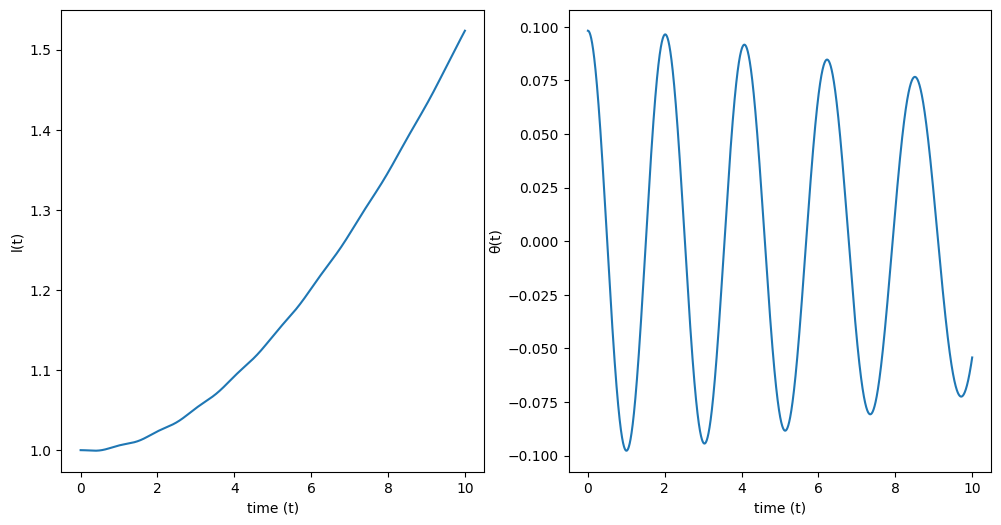

In [11]:
# Visualize the solution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, l_n_t)
plt.xlabel('time (t)')
plt.ylabel('l(t)')

plt.subplot(1, 2, 2)
plt.plot(t, θ_n_t)
plt.xlabel('time (t)')
plt.ylabel('θ(t)')
plt.show()
